Engie Project

Last Update: June 15, 2021

Notes: two cases -- one with EP ratio enforced, one without that constraint

Run Time:

In [730]:
### Initialize
import DataFrames, CSV, Plots, JuMP, Gurobi

In [731]:
using JuMP, Gurobi
Hours = 24
Cp = 1.01
rho = 1.225
Vol = 482.3
SA = 220
MassAir = Vol*rho
U = 0.3 ## W/m2K
UA = SA*U  #W/K
JoulesLost = UA*3600

237600.0

In [732]:
Cost = [0.0444,0.0444,0.0444,0.0444,0.0444,0.0444,0.0444,0.0444,0.0444,0.05413,0.05413,0.05413,0.05413,0.05413,0.05413,     0.0888, 0.0888, 0.0888, 0.0888, 0.0888,0.05413,0.05413,0.05413,0.05413]
PeopleE = [1.266624e+06,1.266624e+06,1.266624e+06,1.266624e+06,1.266624e+06,1.266624e+06,1.266624e+06,
    1.118556e+06,5.175552e+05,3.063837e+05,3.063837e+05,3.063837e+05,3.063837e+05,3.063837e+05,3.063837e+05,
     3.063837e+05,3.736287e+05,7.005697e+05, 1.136073e+06,1.136073e+06,1.136073e+06,1.266624e+06,1.266624e+06,1.266624e+06] ##J
# ## Losses
Qloss = [1000,1000, 1000, 1000, 1000, 1000, 1000, 1000,
    1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000] *1000##kJ

TOutdoor = [1.75,0.6667,-2.16,-2.41,-3.75,-3.83,-3.53,-4,-0.5,6,6,4,4,5.1,5.8,5.3,3.83,0.66,-1,-1,-1,-1,-.416]


#NetHeat = PeopleE-Qloss ## joules

# T1 = 21
# T2 = NetHeat[1]/1000 / (MassAir *Cp) +T1
# T3 = NetHeat[2]/1000 / (MassAir *Cp) +T2

24-element Array{Int64,1}:
 1000000
 1000000
 1000000
 1000000
 1000000
 1000000
 1000000
 1000000
 1000000
 1000000
 1000000
 1000000
 1000000
 1000000
 1000000
 1000000
 1000000
 1000000
 1000000
 1000000
 1000000
 1000000
 1000000
 1000000

In [733]:
model = Model(Gurobi.Optimizer)

Academic license - for non-commercial use only - expires 2022-04-09


A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: Gurobi

In [734]:
## Define the Variables
@variable(model,TSetpoint[1:Hours],container=Array)
@variable(model, HeatingOn[1:Hours], binary=true)
@variable(model,Qsys[1:Hours],container = Array)
@variable(model,TZone[1:Hours],container=Array)
@variable(model,UALoss[1:Hours], container =Array)

24-element Array{VariableRef,1}:
 UALoss[1]
 UALoss[2]
 UALoss[3]
 UALoss[4]
 UALoss[5]
 UALoss[6]
 UALoss[7]
 UALoss[8]
 UALoss[9]
 UALoss[10]
 UALoss[11]
 UALoss[12]
 UALoss[13]
 UALoss[14]
 UALoss[15]
 UALoss[16]
 UALoss[17]
 UALoss[18]
 UALoss[19]
 UALoss[20]
 UALoss[21]
 UALoss[22]
 UALoss[23]
 UALoss[24]

In [735]:
#@constraint(model, [i=1:Hours], TSetpoint[i] <= 40)

In [737]:
##Calculate Heating Needed
@constraint(model, [i=2:Hours], UALoss[i] == JoulesLost*(TOutdoor[i-1]-TZone[i-1]))
@constraint(model, [i=2:Hours], Qsys[i] == HeatingOn[i]*(TSetpoint[i]-TZone[i-1])/(MassAir*Cp)/1000)
@constraint(model, [i=1:Hours], Qsys[i] >= 0)
@constraint(model, [i=1:Hours], Qsys[i] <= 1000000)

24-element Array{ConstraintRef{Model,MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64},MathOptInterface.LessThan{Float64}},ScalarShape},1}:
 Qsys[1] <= 1.0e6
 Qsys[2] <= 1.0e6
 Qsys[3] <= 1.0e6
 Qsys[4] <= 1.0e6
 Qsys[5] <= 1.0e6
 Qsys[6] <= 1.0e6
 Qsys[7] <= 1.0e6
 Qsys[8] <= 1.0e6
 Qsys[9] <= 1.0e6
 Qsys[10] <= 1.0e6
 Qsys[11] <= 1.0e6
 Qsys[12] <= 1.0e6
 Qsys[13] <= 1.0e6
 Qsys[14] <= 1.0e6
 Qsys[15] <= 1.0e6
 Qsys[16] <= 1.0e6
 Qsys[17] <= 1.0e6
 Qsys[18] <= 1.0e6
 Qsys[19] <= 1.0e6
 Qsys[20] <= 1.0e6
 Qsys[21] <= 1.0e6
 Qsys[22] <= 1.0e6
 Qsys[23] <= 1.0e6
 Qsys[24] <= 1.0e6

In [738]:
##Calculate Indoor T
@constraint(model,[i=2:Hours],TZone[i]== TZone[i-1]+(Qsys[i]+NetHeat[i]+UALoss[i])/1000/(MassAir *Cp))

1-dimensional DenseAxisArray{ConstraintRef{Model,MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64},MathOptInterface.EqualTo{Float64}},ScalarShape},1,...} with index sets:
    Dimension 1, 2:24
And data, a 23-element Array{ConstraintRef{Model,MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64},MathOptInterface.EqualTo{Float64}},ScalarShape},1}:
 -1.6758119214494997e-6 Qsys[2] - TZone[1] + TZone[2] - 1.6758119214494997e-6 UALoss[2] == 0.44681167774455144
 -1.6758119214494997e-6 Qsys[3] - TZone[2] + TZone[3] - 1.6758119214494997e-6 UALoss[3] == 0.44681167774455144
 -1.6758119214494997e-6 Qsys[4] - TZone[3] + TZone[4] - 1.6758119214494997e-6 UALoss[4] == 0.44681167774455144
 -1.6758119214494997e-6 Qsys[5] - TZone[4] + TZone[5] - 1.6758119214494997e-6 UALoss[5] == 0.44681167774455144
 -1.6758119214494997e-6 Qsys[6] - TZone[5] + TZone[6] - 1.6758119214494997e-6 UALoss[6] == 0.44681167774455144
 -1.6758119214494997e-6 Qsys[7] - TZone[6

In [739]:
@constraint(model, [i=1:Hours], TZone[i] <= 28)
@constraint(model, [i=1:Hours], TZone[i] >= 18)
#@constraint(model,[i=1:Hours], TSetpoint[i] <=30)

#@constraint(model,[i=2:Hours],TSetpoint[i]== TSetpoint[i-1]+NetHeat/1000/ (MassAir *Cp))
print(TSetpoint)

VariableRef[TSetpoint[1], TSetpoint[2], TSetpoint[3], TSetpoint[4], TSetpoint[5], TSetpoint[6], TSetpoint[7], TSetpoint[8], TSetpoint[9], TSetpoint[10], TSetpoint[11], TSetpoint[12], TSetpoint[13], TSetpoint[14], TSetpoint[15], TSetpoint[16], TSetpoint[17], TSetpoint[18], TSetpoint[19], TSetpoint[20], TSetpoint[21], TSetpoint[22], TSetpoint[23], TSetpoint[24]]

In [740]:
# ## Net Heat

# @constraint(model, [i=2:Hours], Qsys[i] == (TSetpoint[i]-TZone[i-1])*(MassAir*Cp))
# NetHeat = Qsys + PeopleE-Qloss

In [741]:
# ##Zone Temp
#@constraint(model,TZone[1]==21)

# @constraint(model,[i=1:Hours],TZone[i] <= 29)
# @constraint(model,[i=1:Hours],TZone[i] >= 0)
# @constraint(model,[i=2:Hours],TZone[i] >= TZone[i-1]+0.5)
# #@constraint(model, [i=2:Hours], TZone[i]== TZone[i-1] + NetHeat[i]/1000/(MassAir*Cp))
# print(TZone)
# #T2 = NetHeat[1]/1000 / (MassAir *Cp) +T1

In [742]:
TotalCost= sum(Cost.*Qsys/3600)  ##convert to kwh
print(TotalCost)

1.2333333333333334e-5 Qsys[1] + 1.2333333333333334e-5 Qsys[2] + 1.2333333333333334e-5 Qsys[3] + 1.2333333333333334e-5 Qsys[4] + 1.2333333333333334e-5 Qsys[5] + 1.2333333333333334e-5 Qsys[6] + 1.2333333333333334e-5 Qsys[7] + 1.2333333333333334e-5 Qsys[8] + 1.2333333333333334e-5 Qsys[9] + 1.503611111111111e-5 Qsys[10] + 1.503611111111111e-5 Qsys[11] + 1.503611111111111e-5 Qsys[12] + 1.503611111111111e-5 Qsys[13] + 1.503611111111111e-5 Qsys[14] + 1.503611111111111e-5 Qsys[15] + 2.466666666666667e-5 Qsys[16] + 2.466666666666667e-5 Qsys[17] + 2.466666666666667e-5 Qsys[18] + 2.466666666666667e-5 Qsys[19] + 2.466666666666667e-5 Qsys[20] + 1.503611111111111e-5 Qsys[21] + 1.503611111111111e-5 Qsys[22] + 1.503611111111111e-5 Qsys[23] + 1.503611111111111e-5 Qsys[24]

In [743]:
@objective(model, Min, TotalCost)

1.2333333333333334e-5 Qsys[1] + 1.2333333333333334e-5 Qsys[2] + 1.2333333333333334e-5 Qsys[3] + 1.2333333333333334e-5 Qsys[4] + 1.2333333333333334e-5 Qsys[5] + 1.2333333333333334e-5 Qsys[6] + 1.2333333333333334e-5 Qsys[7] + 1.2333333333333334e-5 Qsys[8] + 1.2333333333333334e-5 Qsys[9] + 1.503611111111111e-5 Qsys[10] + 1.503611111111111e-5 Qsys[11] + 1.503611111111111e-5 Qsys[12] + 1.503611111111111e-5 Qsys[13] + 1.503611111111111e-5 Qsys[14] + 1.503611111111111e-5 Qsys[15] + 2.466666666666667e-5 Qsys[16] + 2.466666666666667e-5 Qsys[17] + 2.466666666666667e-5 Qsys[18] + 2.466666666666667e-5 Qsys[19] + 2.466666666666667e-5 Qsys[20] + 1.503611111111111e-5 Qsys[21] + 1.503611111111111e-5 Qsys[22] + 1.503611111111111e-5 Qsys[23] + 1.503611111111111e-5 Qsys[24]

In [744]:
optimize!(model)

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 142 rows, 120 columns and 234 nonzeros
Model fingerprint: 0xcb37619b
Model has 23 quadratic constraints
Variable types: 96 continuous, 24 integer (24 binary)
Coefficient statistics:
  Matrix range     [2e-06, 2e+05]
  QMatrix range    [2e-06, 2e-06]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [1e-05, 2e-05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-01, 1e+06]
Presolve removed 96 rows and 4 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds
Thread count was 1 (of 4 available processors)

Solution count 0

Model is infeasible or unbounded
Best objective -, best bound -, gap -

User-callback calls 27, time in user-callback 0.00 sec


In [745]:
println("Optimal Solutions:")
println("Total Cost = ", value(TotalCost), " dollar")

Optimal Solutions:


LoadError: [91mResult index of attribute MathOptInterface.VariablePrimal(1) out of bounds. There are currently 0 solution(s) in the model.[39m

In [709]:
TSetpoint_Opt= JuMP.value.(TSetpoint)
Qsys_Opt = JuMP.value.(Qsys)
OnOff_Opt= JuMP.value.(HeatingOn)
# print(TSetpoint_Optimized)
TZone_Opt = JuMP.value.(TZone)
# print(OnOff)
print(TSetpoint_Opt)

[0.0, 25.120452375373326, 25.567264053117878, 26.014075730862427, 26.46088740860698, 26.90769908635153, 27.354510764096087, 27.801322441840632, 1.7681205525178278e11, 27.68806260933888, 26.525692144887184, 25.36332168043549, 24.200951215983796, 23.038580751532102, 21.876210287080408, 20.713839822628714, 19.55146935817702, 18.5017888663832, 18.0, 18.228032755587396, 18.456065511174792, 18.684098266762188, 19.130909944506737, 19.577721622251286]

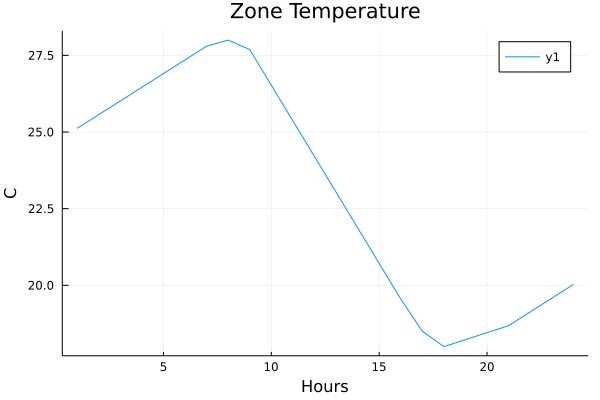

In [710]:
##Indoor T
using Plots
x = 1:Hours
plot(x,TZone_Opt, title = "Zone Temperature")
xlabel!("Hours")
ylabel!("C")


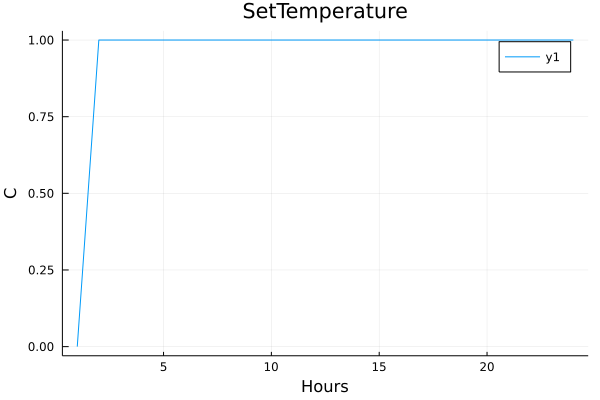

In [711]:
using Plots
x = 1:Hours
plot(x,OnOff_Opt, title = "SetTemperature")
xlabel!("Hours")
ylabel!("C")

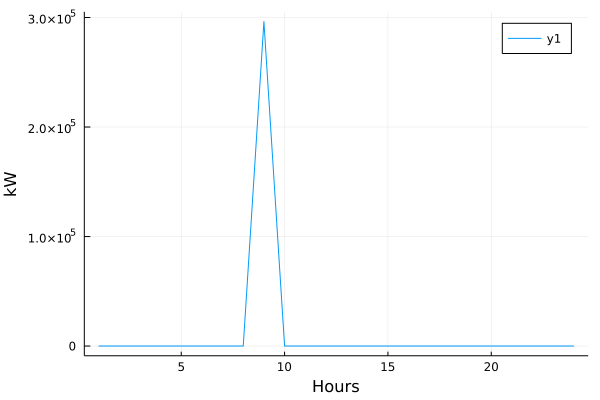

In [712]:
plot(x,Qsys_Opt)
xlabel!("Hours")
ylabel!("kW")
#print(Qsys_Opt)

In [ ]:
##checking that demand is met
plot(x, ElecDemand, alpha =0.5)
check = P_Grid_Optimized + P_Batt_Optimized + PV
plot!(x,check, alpha=0.5)
xlabel!("Hours")
ylabel!("kW")

In [ ]:
using DataFrames
df = DataFrame( E_Batt = E_Batt_Optimized,
                P_Batt = P_Batt_Optimized,
                P_Grid = P_Grid_Optimized,
                P_Buy = P_Buy_Optimized,
                P_Sell = P_Sell_Optimized,
                Demand = ElecDemand,
                PV = PV,
                Binary = JuMP.value.(mu)
               )

In [ ]:
using CSV
CSV.write("Desktop\\OTESoutputnew.csv", df)